# Numerische Methoden für Differentialgleichungen

## Aufgabenblatt 1
*gelöst von Stollmayer Max*

### Aufgabe 1
Das System 2. Ordnung

\begin{cases}
    \ddot{y}_1 = t^2 - \dot{y}_1 - y_2^2 \\
    \ddot{y}_2 = t + \dot{y}_2 + y_1^3 \\
    y_1(0)=0, \dot{y}_1(0)=1, y_2(0)=1, \dot{y}_2(0)=0
\end{cases}

wird umgeschrieben zu einem System 1. Ordnung

\begin{cases}
    \dot{y}_1 = y_3 \\
    \dot{y}_2 = y_4 \\
    \dot{y}_3 = t^2 - y_3 - y_2^2 \\
    \dot{y}_4 = t + y_4 + y_1^3 \\
    y_1(0)=0, y_2(0)=1, y_3(0)=1, y_4(0)=0
\end{cases}

### Aufgabe 2

Implementierung des Vorwärts-Euler-Verfahrens für ODE Systeme 1. Ordnung.

#### Definition

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
def euler(f,y0,t0,tN,N):
    '''Returns a list of input values and corresponding function values approximated with the forward Euler method'''
    h = (tN - t0) / N           # increment size
    t = t0 + h * np.arange(N+1) # grid of input values
    y = np.array([y0])          # initializes list with starting value
    for n in range(1, N+1):
        y = np.append(y, [y[n-1] + h * f(t[n-1], y[n-1])], axis = 0) # appends newly calculated value to the list
    return t, y

#### Test 1

In [3]:
def f(t,y):
    return y

t, y = euler(f,1,1,4,10)
for x, z in zip(t, y):
    print(f"y({x:.1f}) = {z:5.2f}")

y(1.0) =  1.00
y(1.3) =  1.30
y(1.6) =  1.69
y(1.9) =  2.20
y(2.2) =  2.86
y(2.5) =  3.71
y(2.8) =  4.83
y(3.1) =  6.27
y(3.4) =  8.16
y(3.7) = 10.60
y(4.0) = 13.79


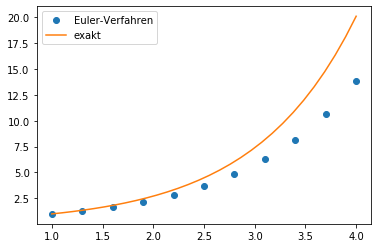

In [4]:
t2 = np.linspace(1, 4, 30)
y2 = np.exp(t2 - 1)

plt.plot(t, y, "o", label = "Euler-Verfahren")
plt.plot(t2, y2, label = "exakt")
plt.legend()

#### Test 2

In [5]:
def g(t,y,a,b,c,d):
    return np.array([-(a-b*y[1])*y[0],(c-d*y[0])*y[1]])

def f(t,y):
    return g(t,y,1,0.1,4,1)

t, y = euler(f,[3,5],0,10,10)
for x, z in zip(t, y):
    print(f"t = {x:2n}:  {z[0]: .2E} Räuber,  {z[1]: .2E} Beute")

t =  0:   3.00E+00 Räuber,   5.00E+00 Beute
t =  1:   1.50E+00 Räuber,   1.00E+01 Beute
t =  2:   1.50E+00 Räuber,   3.50E+01 Beute
t =  3:   5.25E+00 Räuber,   1.22E+02 Beute
t =  4:   6.43E+01 Räuber,  -3.06E+01 Beute
t =  5:  -1.97E+02 Räuber,   1.82E+03 Beute
t =  6:  -3.58E+04 Räuber,   3.67E+05 Beute
t =  7:  -1.31E+09 Räuber,   1.31E+10 Beute
t =  8:  -1.72E+18 Räuber,   1.72E+19 Beute
t =  9:  -2.97E+36 Räuber,   2.97E+37 Beute
t = 10:  -8.81E+72 Räuber,   8.81E+73 Beute


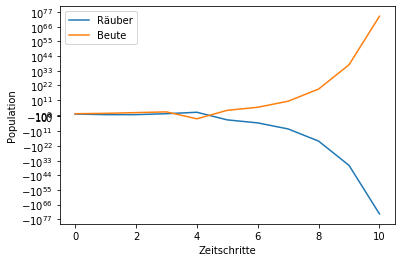

In [6]:
plt.plot(t, y[:,0], label = "Räuber")
plt.plot(t, y[:,1], label = "Beute")
plt.xlabel("Zeitschritte")
plt.ylabel("Population")
plt.yscale("symlog")
plt.legend()